# `ComminWeath.jl` Examples

This Jupyter notebook illustrates how to use the `ComminWeath.jl` package. 

The primary function in this package is the `comminweath` function, which returns a `NamedTuple` of vectors containing the evolution of various U-series compositions over a given timescales (default: 0 – 2 million years with a 1 year timestep). 

As inputs, `comminweath` takes a grain diameter (in μm), followed by 4 custom types that contain the various parameters that describe the simulated systems. Each of these types are "mutable", meaning you can change values of an instance, e.g.

```julia
julia> d=Detrital() # create a default instance of Detrital()
Detrital(200.0, 1.0, 1.0)

julia> d.r48 = 1.147 # update the r48 field.
1.147

julia> d
Detrital(200.0, 1.147, 1.0)

```

In the following cells, you can declare custom instances of each of these types, or generate an instance and update the fields of interest (e.g. as above). The following tables describe the fields of each of the 4 different types.

## `Grain`

Detrital grain morphology and α-recoil parameters.

| field | units | description | 
| ----- | ----- | ----------- |
| `K`   |       | grain shape factor (Cartwright, 1962, doi:[10.1093/annhyg/5.3.163](https://doi.org/10.1093/annhyg/5.3.163)) |
| `rfr` |       | surface roughness factor (White et al., 1996, doi: [10.1016/0016-7037(96)00106-8](https://doi.org/10.1016/0016-7037(96)00106-8)) |
| `rho` | kg/m³ | bulk density |
| `L234`| nm    | recoil length of ²³⁴U |
| `L230`| nm    | recoil length of ²³⁰Th |


---

## `Detrital`

Initial detrital grain U-series parameters.

| field | units | description | 
| :----- | :-----: | :----------- |
| `cU`  | ng/g  | concentration of U in detrital phase | 
| `r48` |       | initial (²³⁴U/²³⁸U) of detrital grain |
| `r08` |       | initial (²³⁰Th/²³⁸U) of detrital grain | 

---

## `WxAuth`

Parameters of chemical weathering / authigenic replacement.

| field | units | description | 
| :----- | :-----: | :----------- |
| `sa_dependent` | (boolean) | surface area dependence (ON = `true`)  |
| `k`   | g m⁻² a⁻¹ | rate of detrital phase alteration to authigenic phaseⁱ |
| `k_power` |   | exponent on `k` for (time-dependent) power-law weathering rate |
| `cU`  | ng/g  | concentration of U in authigenic phase | 
| `r48` |       | initial (²³⁴U/²³⁸U) of authigenic phase |
| `r08` |       | initial (²³⁰Th/²³⁸U) of authigenic phase | 
    

ⁱg m⁻² a⁻¹ if `sa_exponent`=`true`, (g g⁻¹) a⁻¹ if `sa_exponent`=`false`. This is an initial rate if `k_power` ≠ 1.

ⁱⁱNot explored in this study, so it is set to 1 for a constant weathering rate, but it's there if you want it!

---

## `Rind`

Authigenic soluble rind parameters.

| field | units | description | 
| :---- | :---: | :---------- |
| `evolve` | (boolean) | rind composition evolves (ON = `true`) |
| `p`   |       | proportion of grain covered by rind |
| `z`   |  μm   | thickness of rind |
| `rho` | kg/m³ | bulk density of rind phase |
| `cU`  | ng/g  | concentration of U in rind phase | 
| `r48` |       | initial (²³⁴U/²³⁸U) of rind phase|
| `r08` |       | initial (²³⁰Th/²³⁸U) of rind phase| 

---
---

To facilitate efficiently viewing the outputs, this notebook loads plotting functions from `examples/visualizations.jl`. These are loaded in the following cell.  In the cell after that, you may adjust the various values of the parameters to explore their effects on the U-series evolutions of fine-grained sediments.

In [1]:
# Run this cell once to load the relevant packages and plotting functions
using ComminWeath # load the ComminWeath package 
using CairoMakie # load a Makie backend for plotting functions
include("visualizations.jl") # load plotting/visualization functions
loadcolorscheme() # load the custom color scheme.

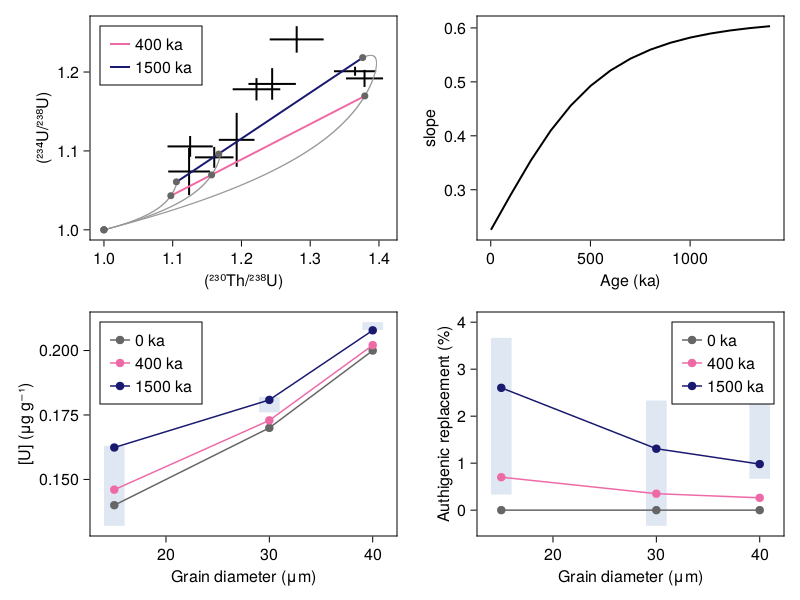

In [2]:
grain_diameters = [15, 30, 40.] # μm
ages = [0, 400, 1500.] # ka 


cU = [140., 170, 200. ] # uranium concentration of each grain size (ng/g), must be the same length as grain_diameters

data = TaylorIII() # alternative options are TaylorI(), TaylorIV(), or (;) for no data
cUmeas = [(0.132,0.163), (0.176,0.182), (0.208,0.211)] # Ranges 
authmeas = [(1.,11.)./3, (-1.,7.)./3, (2.,12.)./3] # Ranges of authigenic alteration (%) for Taylor III sediments, calculated assuming an initial CIA of 1 and authigenic CIA of 4 (i.e. 4-1=3 in denominator)

###

g = Grain()
g.K = 10
g.rfr = 7
g.rho = 2650
g.L234 = 34
g.L230 = 37

###

d=Detrital()
d.cU = 200
d.r48 = 1
d.r08 = 1

###

w=WxAuth()
w.sa_dependent = true
w.k = 1e-8
#w.k_power = 1 # Not tested for non-unity values. 
w.cU = 1000.
w.r48 =3.0
w.r08 = 4.6

###

r=Rind()
r.evolve = true
r.p = 0.4
r.z = 0.1
r.rho = 2500
r.cU = 2000
r.r48 = 3
r.r08 = 4.6

###

## Prepare the output figure.
GC.gc() # first this clears up memory and prevents the binder kernel from exceeding its memory limit.
fig=Figure()
gd, t = float.(grain_diameters), float.(ages) # convert any integers to floats.
plotUseries(gd, t, f=fig[1,1],cU=cU, g=g, d=d, wx=w, r=r, meas=data)
plotslopes(1:100:1500., f=fig[1,2], g=g, d=d, wx=w, r=r)
plotcU(gd, t, cU=cU, f=fig[2,1], meas=cUmeas)
plotauthreplace(gd,t,f=fig[2,2],cU=cU,wx=w,meas=authmeas)
fig

---
---

## Individual functions
Alternatively, you can calculate U-series histories for individual grains and examine the data yourself.

The cell below calculates the U-series evolution of a 30 μm grain over 2 million years (with a 1 year timestep) using default parameters.

In [5]:
grainhistory = comminweath(30., Grain(), Detrital(), WxAuth(), Rind(), timeseries=0:2e6); # the output is hidden with a semicolon, since it is large. 

We can then extract extract the (²³⁴U/²³⁸U) (`A234`), (²³⁰Th/²³⁸U) (`A230`), and U concentration (`cU`) of a sediment grain for a date or a collection of dates (in ka) in `grainhistory`:

In [6]:
drawdate(500, grainhistory)

(A234 = 1.0638377663360574, A230 = 1.1332054610159914, cU = 203.49865706542445)

In [7]:
drawdates([200,1e3], grainhistory)

(A234 = [1.0368857209707685, 1.0777523364628807], A230 = [1.1055842515077778, 1.1389189406897795], cU = [201.40134401729236, 206.981674931185])